   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.4 MB/s eta 0:00:00
Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977942 entries, 0 to 1977941
Data columns (total 32 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   income                            float64
 1   name_email_similarity             float64
 2   prev_address_months_count         int64  
 3   current_address_months_count      int64  
 4   customer_age                      int64  
 5   days_since_request                float64
 6   intended_balcon_amount            float64
 7   payment_type                      float64
 8   zip_count_4w                      int64  
 9   velocity_6h                       float64
 10  velocity_24h                      float64
 11  velocity_4w                       float64
 12  bank_branch_count_8w              int64  
 13  date_of_birth_distinct_emails_4w  int64  
 14  employment_status          

None

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,fraud_bool
0,0.3,0.986506,-1,25,40,0.006735,102.453711,0.0,1059,13096.035018,...,1500.0,0,0.0,16.224843,0.0,1,1,0,0,0
1,0.8,0.617426,-1,89,20,0.010095,-0.849551,3.0,1658,9223.283431,...,1500.0,0,0.0,3.363854,2.0,1,1,0,0,0
2,0.8,0.996707,9,14,40,0.012316,-1.490386,1.0,1095,4471.472149,...,200.0,0,0.0,22.730559,3.0,0,1,0,0,0
3,0.6,0.475100,11,14,30,0.006991,-1.863101,1.0,3483,14431.993621,...,200.0,0,0.0,15.215816,0.0,1,1,0,0,0
4,0.9,0.842307,-1,29,40,5.742626,47.152498,0.0,2339,7601.511579,...,200.0,0,0.0,3.743048,2.0,0,1,0,0,0


Accuracy: 0.98
Precision: 0.96
Recall: 0.99
F1-score: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98    197779
           1       0.96      0.99      0.98    197810

    accuracy                           0.98    395589
   macro avg       0.98      0.98      0.98    395589
weighted avg       0.98      0.98      0.98    395589



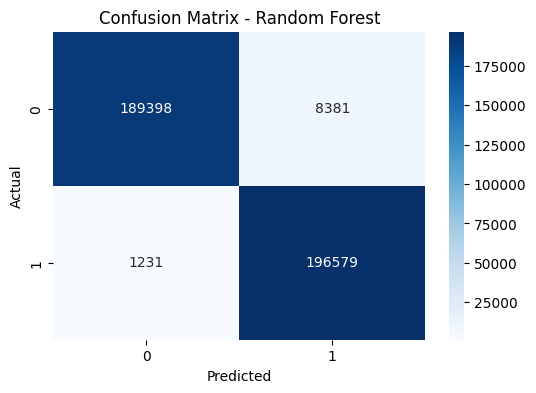

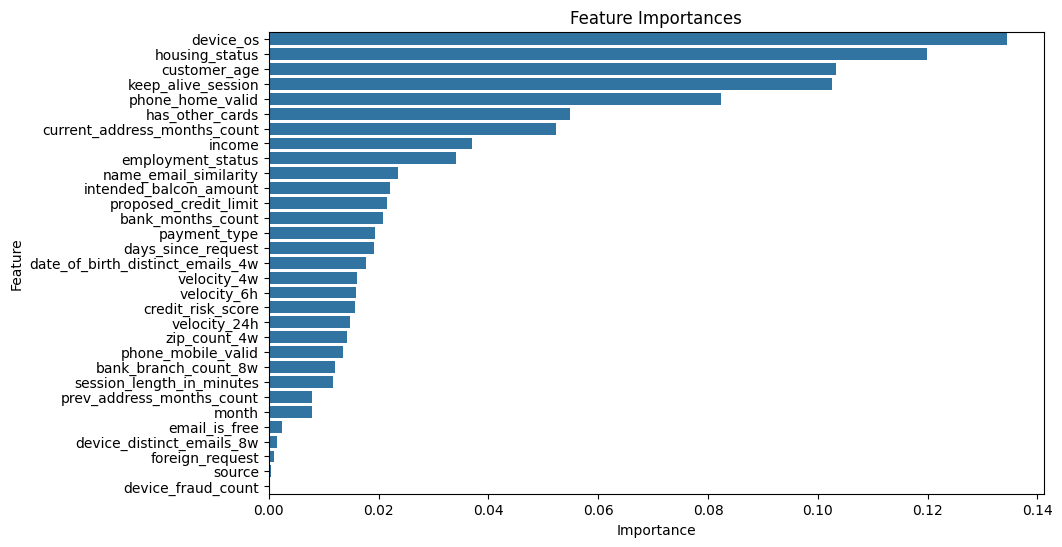

In [ ]:
!pip install google-colab
#!pip install --upgrade --force-reinstall pandas
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# just running on base.csv because it takes too long to run on both of them
# also switch out for the balanced one- meaning one block for balanced results and other for unbalanced results

drive.mount('/content/drive')
path = '/content/drive/Shareddrives/DS Capstone/base_baf_final.csv'
df = pd.read_csv(path)

# Display basic information
display(df.info())
display(df.head())

# Handle missing values
df.dropna(inplace=True)

# Encode categorical features
categorical_features = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

# Separate features and target variable
y = df['fraud_bool']
X = df.drop(columns=['fraud_bool'])

# consistency purposes
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model with class balancing
rf_model = RandomForestClassifier(n_estimators=50, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions using probabilities
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
threshold = 0.3
y_pred = (y_pred_proba > threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)


'''BAC and ROC for report
#from sklearn.metrics import balanced_accuracy_score
# Compute Balanced Accuracy
#balanced_acc = balanced_accuracy_score(y_test, y_pred)
#print(f'Balanced Accuracy: {balanced_acc:.2%}')
'''



print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Feature Importance
feature_importances = pd.DataFrame({'Feature': df.drop(columns=['fraud_bool']).columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()


In [ ]:
'''

code based on finalcode.ipynb for report, use when needed

# Finding TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fpr_target = 0.05
threshold_at_fpr_5 = thresholds[np.where(fpr >= fpr_target)[0][0]]

# Calculate TPR at that threshold
tpr_at_fpr_5 = tpr[np.where(fpr >= fpr_target)[0][0]]

print(f'(Unbalanced LR) TPR at FPR = 5%: {tpr_at_fpr_5:.4f}') '''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977942 entries, 0 to 1977941
Data columns (total 32 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   income                            float64
 1   name_email_similarity             float64
 2   prev_address_months_count         float64
 3   current_address_months_count      float64
 4   customer_age                      float64
 5   days_since_request                float64
 6   intended_balcon_amount            float64
 7   payment_type                      float64
 8   zip_count_4w                      float64
 9   velocity_6h                       float64
 10  velocity_24h                      float64
 11  velocity_4w                       float64
 12  bank_branch_count_8w              float64
 13  date_of_birth_distinct_emails_4w  float64
 14  e

None

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,fraud_bool
0,0.250,0.986507,0.000000,0.060606,0.375,0.000086,0.918255,0.00,0.157934,0.785651,...,0.685864,0.0,0.0,0.198216,0.00,1.0,0.666667,0.0,0.0,0
1,0.875,0.617426,0.000000,0.209790,0.125,0.000129,0.114260,0.75,0.247350,0.556307,...,0.685864,0.0,0.0,0.050217,0.50,1.0,0.666667,0.0,0.0,0
2,0.875,0.996708,0.026042,0.034965,0.375,0.000157,0.109273,0.25,0.163308,0.274904,...,0.005236,0.0,0.0,0.273082,0.75,0.0,0.666667,0.0,0.0,0
3,0.625,0.475100,0.031250,0.034965,0.250,0.000089,0.106372,0.25,0.519779,0.864767,...,0.005236,0.0,0.0,0.186605,0.00,1.0,0.666667,0.0,0.0,0
4,1.000,0.842307,0.000000,0.069930,0.375,0.073195,0.487853,0.00,0.349007,0.460265,...,0.005236,0.0,0.0,0.054581,0.50,0.0,0.666667,0.0,0.0,0


Accuracy: 0.97
Precision: 0.96
Recall: 0.99
F1-score: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97    296961
           1       0.96      0.99      0.98    296422

    accuracy                           0.97    593383
   macro avg       0.98      0.97      0.97    593383
weighted avg       0.98      0.97      0.97    593383



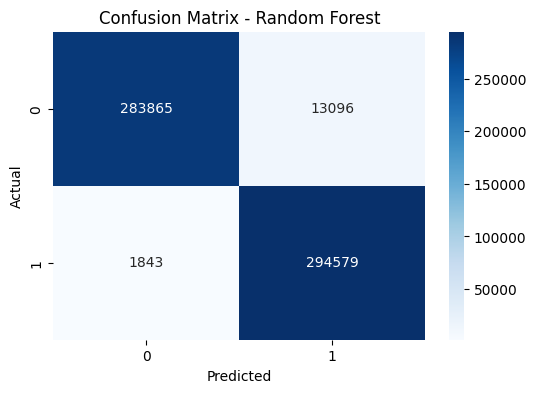

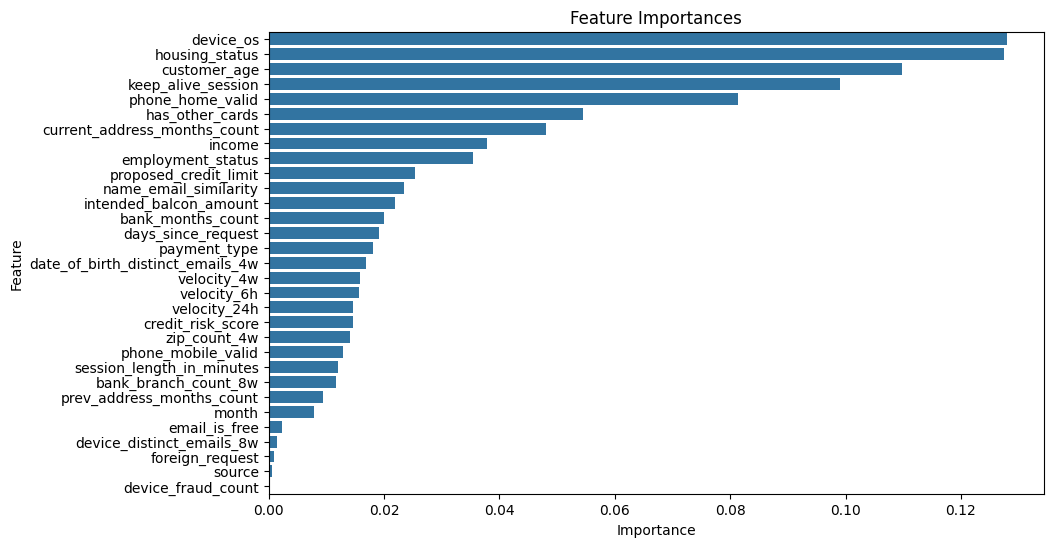

Balanced Accuracy: 97.48%


In [3]:
!pip install google-colab
#!pip install --upgrade --force-reinstall pandas
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# just running on base.csv because it takes too long to run on both of them
# also switch out for the balanced one

drive.mount('/content/drive')
path = '/content/drive/Shareddrives/DS Capstone/smote_baf_final.csv'
df = pd.read_csv(path)

# Display basic information
display(df.info())
display(df.head())

# Handle missing values
df.dropna(inplace=True)

# Encode categorical features
categorical_features = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

# Separate features and target variable
y = df['fraud_bool']
X = df.drop(columns=['fraud_bool'])

# Standardize numerical features (Random Forest doesn’t need it, but keeping it for consistency)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model with class balancing
rf_model = RandomForestClassifier(n_estimators=50, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions using probabilities
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
threshold = 0.3
y_pred = (y_pred_proba > threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix, visualizations to see consistent with the code
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Feature Importance
feature_importances = pd.DataFrame({'Feature': df.drop(columns=['fraud_bool']).columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()





Balanced Dataset Results:
Accuracy: 0.9746
Precision: 0.9570
Recall: 0.9937
F1-score: 0.9751

Unbalanced Dataset Results:
Accuracy: 0.9890
Precision: 0.3347
Recall: 0.0246
F1-score: 0.0458


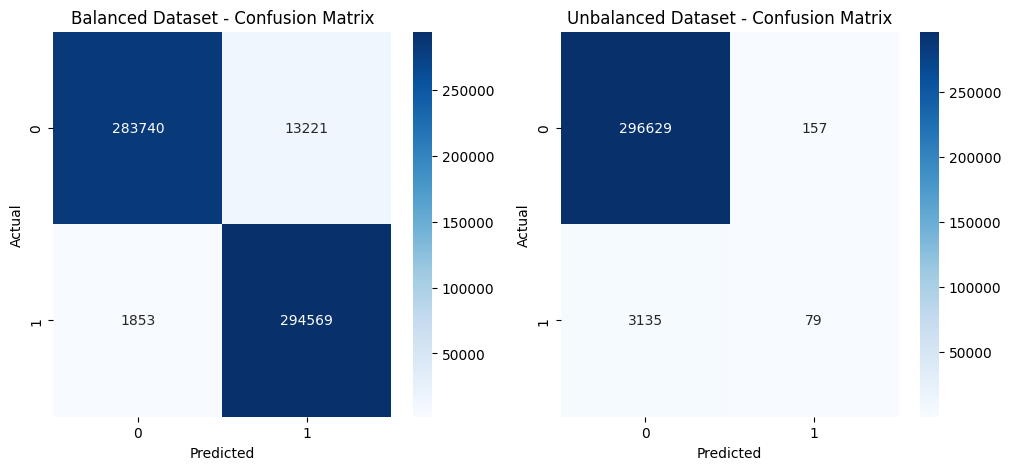

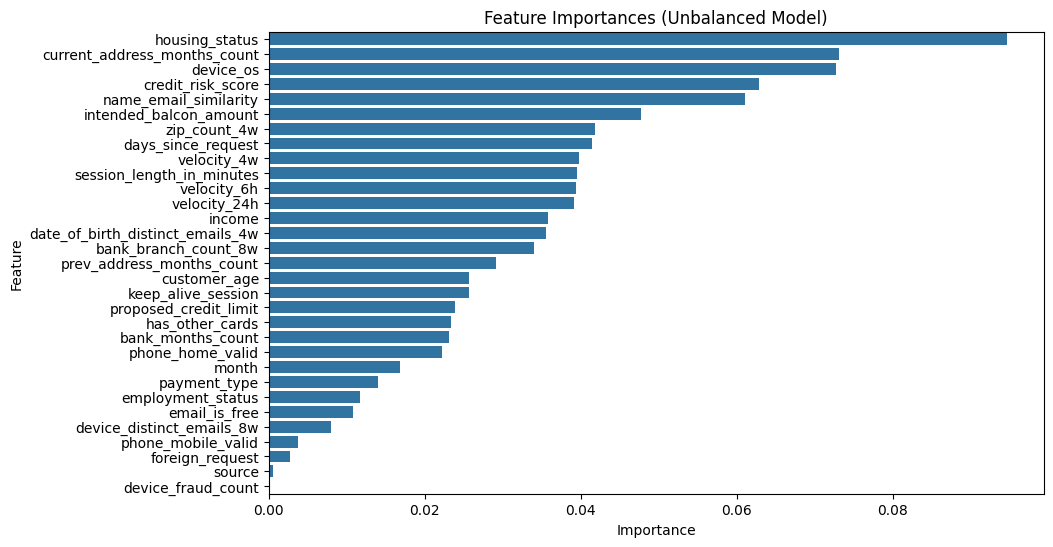

In [2]:
!pip install google-colab
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


unbalanced_df = pd.read_csv('/content/drive/Shareddrives/DS Capstone/base_baf_final.csv')  # Unbalanced dataset
balanced_df = pd.read_csv('/content/drive/Shareddrives/DS Capstone/smote_baf_final.csv')   # Balanced dataset

# Function to preprocess the dataset, also easier to visualize in my head
def preprocess_data(df):
    # Handle missing values
    df.dropna(inplace=True)

    # Encode categorical features
    categorical_features = df.select_dtypes(include=['object']).columns
    encoder = LabelEncoder()
    for feature in categorical_features:
        df[feature] = encoder.fit_transform(df[feature])

    # Separate features and target variable
    y = df['fraud_bool']
    X = df.drop(columns=['fraud_bool'])

    return X, y

# Preprocess both datasets
X_unbalanced, y_unbalanced = preprocess_data(unbalanced_df)
X_balanced, y_balanced = preprocess_data(balanced_df)

# Standardize features for consistency
scaler = StandardScaler()
X_unbalanced = scaler.fit_transform(X_unbalanced)
X_balanced = scaler.fit_transform(X_balanced)

# Split data into training and testing sets
X_train_unbal, X_test_unbal, y_train_unbal, y_test_unbal = train_test_split(X_unbalanced, y_unbalanced, test_size=0.3, random_state=42)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Initialize and train the Random Forest models
rf_model_unbal = RandomForestClassifier(n_estimators=50, class_weight="balanced", random_state=42)
rf_model_bal = RandomForestClassifier(n_estimators=50, random_state=42)

rf_model_unbal.fit(X_train_unbal, y_train_unbal)
rf_model_bal.fit(X_train_bal, y_train_bal)

# Make predictions because using the adjusted threshold helps recall for the given fraud cases
threshold = 0.3

y_pred_proba_unbal = rf_model_unbal.predict_proba(X_test_unbal)[:, 1]
y_pred_proba_bal = rf_model_bal.predict_proba(X_test_bal)[:, 1]

y_pred_unbal = (y_pred_proba_unbal > threshold).astype(int)
y_pred_bal = (y_pred_proba_bal > threshold).astype(int)

# Evaluate the models, zero division is given when there is no positive to exist to prevent throwing an error
results = {
    "Balanced Dataset": {
        "Accuracy": accuracy_score(y_test_bal, y_pred_bal),
        "Precision": precision_score(y_test_bal, y_pred_bal, zero_division=1),
        "Recall": recall_score(y_test_bal, y_pred_bal, zero_division=1),
        "F1-score": f1_score(y_test_bal, y_pred_bal, zero_division=1),
    },
    "Unbalanced Dataset": {
        "Accuracy": accuracy_score(y_test_unbal, y_pred_unbal),
        "Precision": precision_score(y_test_unbal, y_pred_unbal, zero_division=1),
        "Recall": recall_score(y_test_unbal, y_pred_unbal, zero_division=1),
        "F1-score": f1_score(y_test_unbal, y_pred_unbal, zero_division=1),
    },
}

# Display results
for dataset, metrics in results.items():
    print(f"\n{dataset} Results:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Confusion Matrices, visualizations to stay consistent with the code fiven
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test_bal, y_pred_bal), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Balanced Dataset - Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test_unbal, y_pred_unbal), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Unbalanced Dataset - Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()
"""
Feature Importance (unneccessary)
#feature_importances = pd.DataFrame({'Feature': unbalanced_df.drop(columns=['fraud_bool']).columns,
                                    'Importance': rf_model_unbal.feature_importances_})
#feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

#plt.figure(figsize=(10, 6))
#sns.barplot(x='Importance', y='Feature', data=feature_importances)
#plt.title('Feature Importances (Unbalanced Model)')
plt.show()

"""
